In [1]:
import numpy as np
import sympy as sp

from sumpy.expansion.diff_op import (
    make_identity_diff_op,
)
from collections import namedtuple
DerivativeIdentifier = namedtuple("DerivativeIdentifier", ["mi", "vec_idx"])

from sumpy.recurrence import _make_sympy_vec, get_reindexed_and_center_origin_on_axis_recurrence

from immutabledict import immutabledict
from sumpy.expansion.diff_op import LinearPDESystemOperator

In [2]:
from test_recurrence_qbx import _create_ellipse
n_p = 1000
a = 2
mode_nr = 10
sources, centers, normals, density, jacobs, radius = _create_ellipse(n_p, a=a, quad_convg_rate=100, mode_nr=mode_nr)
t = np.linspace(0, 2 * np.pi, n_p, endpoint=False)

In [3]:
def give_true_sol(n_p, a=2, n=10):
    r = 1/a
    mu_n = 1/(2*n) * (1 + ((1-r)/(1+r))**n)

    phi = sp.symbols("phi")
    jacob = sp.sqrt(a**2 * sp.sin(phi)**2 + sp.cos(phi)**2)

    t = np.linspace(0, 2 * np.pi, n_p, endpoint=False)
    true_sol = mu_n * sp.lambdify(phi, jacob)(t) * density

    return true_sol

In [4]:
from sumpy.array_context import _acf
from sumpy.expansion.local import LineTaylorLocalExpansion
from sumpy.kernel import LaplaceKernel
from test_recurrence_qbx import _qbx_lp_general
actx_factory = _acf
ExpnClass = LineTaylorLocalExpansion

actx = actx_factory()
lknl2d = LaplaceKernel(2)
strengths = jacobs * density * (2*np.pi/(n_p)) 
p = 11
qbx_res = _qbx_lp_general(lknl2d, sources, sources, centers,
                                          radius, strengths, p)

In [5]:
true_sol = give_true_sol(n_p, a=a, n=mode_nr)
rel_err = np.max(np.abs(qbx_res-true_sol))

In [6]:
h = 9.69/n_p

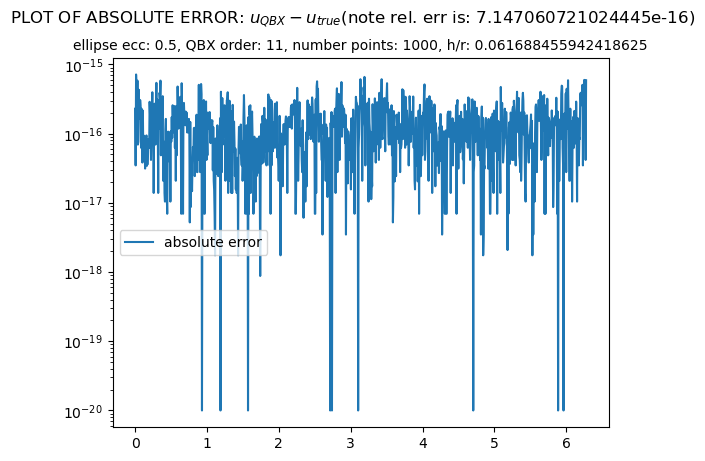

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_yscale('log')
ax.plot(t, (abs(qbx_res-true_sol)+1e-20), label="absolute error")
plt.suptitle("PLOT OF ABSOLUTE ERROR: $u_{QBX}-u_{true}$"+ "(note rel. err is: " + str(rel_err)+")")
ax.set_title("ellipse ecc: "+str(1/a)+", QBX order: "+str(p) + ", number points: " + str(n_p) + ", h/r: "+ str(h/radius), fontdict={'size': 10})
ax.legend()

In [8]:
radius

0.15707963267948966

In [9]:
h

0.009689999999999999

In [10]:
h/radius

0.061688455942418625

In [11]:
1/10

0.1